## Tutorial: Data

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import os
os.environ["XLA_FLAGS"] = '--xla_force_host_platform_device_count=2'
import numpyro
numpyro.enable_x64()
import jax
from jax._src.config import config
config.update("jax_enable_x64", True)
import jax.numpy as jnp

import pandas as pd
import matplotlib.pyplot as plt

I'll be assuming that not all data sets will have consistent naming.
He're i'll show an example of how to write a simple subclass that will then allow you to use the builtin methods in DynamicAll

In [30]:
import dynamicAll
from dynamicAll import data,models

In [31]:
data_path = '/Users/juan/Desktop/dracoish.txt'

In [32]:
input_data = pd.read_csv(data_path,header=0).dropna() # drop all nan values

In [33]:
input_data

RA       DEC     MAG_G     MAG_I   ANGSEP    RPROJ        SNR  \
0      53.88518 -54.02280  23.32272  23.12567  0.07122  0.09447    5.41586   
1      54.06523 -53.93597  17.65393  16.74092  0.07465  0.09902  363.11669   
2      54.06599 -53.77255  19.90599  19.92407  0.23075  0.30608   68.42616   
3      54.02349 -53.97031  23.25164  23.05304  0.03274  0.04343    5.71572   
4      54.02006 -53.96624  21.72529  21.27512  0.03576  0.04743   25.99445   
...         ...       ...       ...       ...      ...      ...        ...   
11047  53.87506 -53.98700  21.87238  21.42785  0.07459  0.09894   23.23569   
11048  54.02857 -54.20824  22.87137  22.61137  0.20891  0.27711    8.54196   
11049  53.85962 -53.76057  22.81739  22.53252  0.25333  0.33603    9.07093   
11050  54.15867 -53.91983  19.48593  18.89245  0.12306  0.16323  124.43928   
11051  54.10683 -53.99053  23.34813  23.15163  0.06351  0.08424    5.30868   

          VTRUE    VSTAT     VSYS     VMEAS  VMEASERR  VSYSERR     VERR  
0      44.11046 -0.68338  0.70942  44.13650   4.16485      2.0  4.62017  
1      72.04525  0.03049  3.05323  75.12897   0.02679      2.0  2.00018  
2      56.36690 -0.17761 -0.02299  56.16629   0.19849      2.0  2.00983  
3      65.04756  2.09910 -5.76456  61.38210   3.90405      2.0  4.38652  
4      59.43007  0.01197 -0.68023  58.76180   0.63408      2.0  2.09811  
...         ...      ...      ...       ...       ...      ...      ...  
11047  48.53974 -0.14664  1.43758  49.83068   0.72546      2.0  2.12751  
11048  69.48248 -2.54854 -3.29287  63.64107   2.41063      2.0  3.13228  
11049  67.13552 -1.77017 -0.58418  64.78117   2.24294      2.0  3.00513  
11050  64.93852 -0.18654  1.14014  65.89211   0.09684      2.0  2.00234  
11051  64.66226 -5.47644 -1.52087  57.66495   4.26595      2.0  4.71151  

[11052 rows x 14 columns]

In [34]:
R     = input_data['RPROJ'].values
vlos  = input_data['VMEAS'].values
error = input_data['VERR'].values

In [35]:
error

array([4.62017, 2.00018, 2.00983, ..., 3.00513, 2.00234, 4.71151])

(array([  2.,   1.,   3.,   4.,   8.,  14.,  19.,  24.,  39.,  55.,  46.,
         68., 102., 119., 141., 171., 236., 291., 276., 329., 383., 410.,
        471., 457., 487., 501., 516., 551., 520., 494., 506., 513., 421.,
        387., 401., 330., 315., 274., 234., 238., 170., 124.,  84.,  80.,
         76.,  46.,  35.,  21.,  24.,   9.,  15.,   6.,   1.,   2.,   2.]),
 array([27.37826   , 28.55487164, 29.73148327, 30.90809491, 32.08470655,
        33.26131818, 34.43792982, 35.61454145, 36.79115309, 37.96776473,
        39.14437636, 40.320988  , 41.49759964, 42.67421127, 43.85082291,
        45.02743455, 46.20404618, 47.38065782, 48.55726945, 49.73388109,
        50.91049273, 52.08710436, 53.263716  , 54.44032764, 55.61693927,
        56.79355091, 57.97016255, 59.14677418, 60.32338582, 61.49999745,
        62.67660909, 63.85322073, 65.02983236, 66.206444  , 67.38305564,
        68.55966727, 69.73627891, 70.91289055, 72.08950218, 73.26611382,
        74.44272545, 75.61933709, 76.7959487

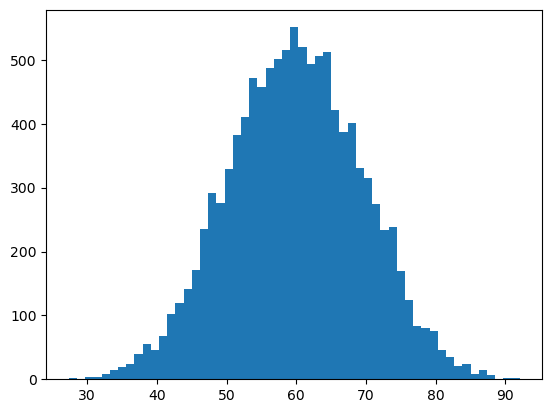

In [36]:
fig,ax = plt.subplots()
ax.hist(vlos,bins='auto')

In [37]:
class Dsphsim(dynamicAll.base.Data):

    def __init__(self,table):
        self.table = table
        self._R     = table['RPROJ'].values
        self._vlos  = table['VMEAS'].values
        self.d_vlos = table['VERR'].values
        
        super().__init__()

In [38]:
dataSet = Dsphsim(input_data)

Don't worry about the warnings. it'll give out some sort of warning unless you put in 6D data.

In [39]:
print(dataSet._component_map.keys())

dict_keys(['los'])


In [40]:
dataSet._component_map

{'los': (array([0.09447, 0.09902, 0.30608, ..., 0.33603, 0.16323, 0.08424]),
  array([44.1365 , 75.12897, 56.16629, ..., 64.78117, 65.89211, 57.66495]),
  array([4.62017, 2.00018, 2.00983, ..., 3.00513, 2.00234, 4.71151]))}

In [41]:
# R_center,los_disp,dlos_disp,bin_edges = dataSet.dispersion_i('los',binfunc=np.histogram,bins='auto',clear_cache=True)
R_center,los_disp,dlos_disp,bin_edges = dataSet.dispersion_i('los',clear_cache=True)#binfunc=np.histogram,bins='auto',clear_cache=True)

sample: 100%|██████████| 1500/1500 [00:01<00:00, 867.29it/s, 1 steps of size 4.76e-01. acc. prob=0.93] 



                     mean       std    median      5.0%     95.0%     n_eff     r_hat
  global_sigmav      8.91      0.07      8.91      8.79      9.01    331.43      1.00
  mean_velocity     59.91      0.09     59.90     59.75     60.05    952.53      1.00

Number of divergences: 0


sample: 100%|██████████| 1500/1500 [00:02<00:00, 588.97it/s, 7 steps of size 6.69e-01. acc. prob=0.86] 



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
 dispersion[0]     12.54      1.73     12.39      9.91     15.28   1957.13      1.00
 dispersion[1]      9.85      0.58      9.81      8.89     10.74   2601.76      1.00
 dispersion[2]      9.90      0.47      9.88      9.22     10.71   2603.38      1.00
 dispersion[3]     10.45      0.33     10.43      9.95     11.02   2965.87      1.00
 dispersion[4]      9.33      0.14      9.33      9.10      9.57   2309.39      1.00
 dispersion[5]      8.75      0.14      8.75      8.53      8.98   2145.39      1.00
 dispersion[6]      8.37      0.19      8.37      8.06      8.68   2252.81      1.00
 dispersion[7]      9.00      0.30      9.00      8.54      9.53   1945.37      1.00
 dispersion[8]      8.45      0.22      8.45      8.07      8.80   2366.23      1.00
 dispersion[9]      8.60      0.34      8.58      7.98      9.08   2292.02      1.00
dispersion[10]      8.54      0.29      8.53      8.12      9.05

In [42]:
dataSet._component_map['los']

(array([0.09447, 0.09902, 0.30608, ..., 0.33603, 0.16323, 0.08424]),
 array([44.1365 , 75.12897, 56.16629, ..., 64.78117, 65.89211, 57.66495]),
 array([4.62017, 2.00018, 2.00983, ..., 3.00513, 2.00234, 4.71151]))

[None,
 Text(0.5, 0, 'R'),
 Text(0, 0.5, '$\\sigma_{\\rm los}(R) $'),
 (0.0, 20.0)]

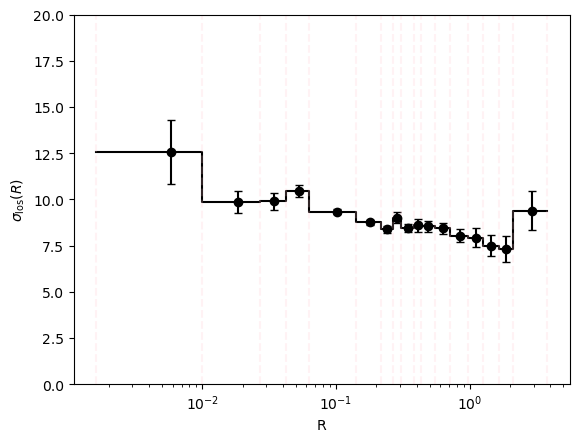

In [43]:
import numpy as np
fig,ax  =plt.subplots()

# First plot error bars
ax.errorbar(R_center,los_disp,yerr=dlos_disp,fmt='o',color='k',capsize=3,elinewidth=1.5)

# plot step function -- Note ax.step is a bit misleading so we'll do it a bit more carefully.

step_edges = np.repeat(bin_edges, 2)[1:-1]

ax.step(step_edges, np.repeat(los_disp, 2), where='post', label='Binned Data', linewidth=1.5,color='k')

for i in bin_edges:
    ax.axvline(i,ls='--',alpha=0.2,color='pink')

ax.set(
    xscale = 'log',
    xlabel = 'R',
    ylabel =r'$\sigma_{\rm los}(R) $',
    ylim=(0,20),
)

[1.08404907e+04 1.95615534e-01] [[2.32480862e+04 2.24652870e-01]
 [2.24652870e-01 2.28778919e-06]]


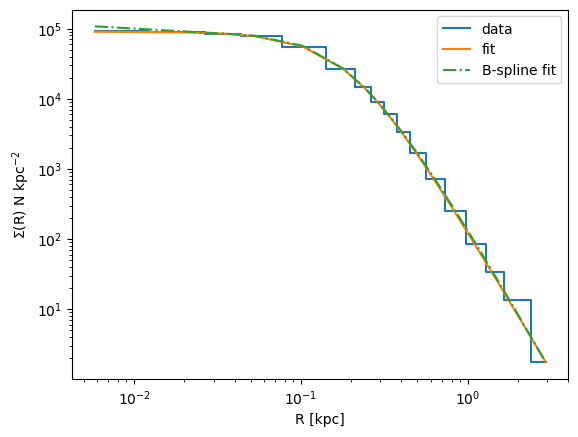

In [44]:
# Define function you want to fit the data to
func = models.Plummer._projection
# plot curve_fit of curve
fig, ax,popt,pcov = dataSet.fit_projection(func,p0 = [1e3,0.25])

# plot B-spline fit
ax.plot(R_center,dataSet.bspline_projected(R_center),
    linestyle='-.',
    label='B-spline fit')
# # plot truth
# ax.plot(R_center,models.Plummer.projection(R_center,1e3,0.25),
#     label='truth',
#     linestyle ='--')
ax.legend();
print(popt,pcov)

In [45]:
from dynamicAll import fit

In [46]:
from numpyro import distributions as dist
priors = fit.Priors()
tracer_priors = {
    'tracer_M':dist.Normal(1e4,100), #update thats based on the fit above
    'tracer_a':dist.Normal(.226,.01),
}

dm_priors = {
    'dm_gamma': dist.Uniform(-1.0, 2.0),
    'dm_rhos' : dist.Uniform(5,30),  # These are in logspace
    'dm_rs'   : dist.Uniform(-10,10) # These are in logspace
}

anisotropy_priors = {
    'beta_0': dist.Uniform(-1,1)
    }


priors.add_from_dict(tracer_priors)
priors.add_from_dict(dm_priors)
priors.add_from_dict(anisotropy_priors)
# check priors
priors

Parameter: tracer_M, Distribution: Normal, Mean: 1.00e+04, StdDev: 1.00e+02
Parameter: tracer_a, Distribution: Normal, Mean: 2.26e-01, StdDev: 1.00e-02
Parameter: dm_gamma, Distribution: Uniform, Bounds: (-1.00e+00, 2.00e+00)
Parameter: dm_rhos, Distribution: Uniform, Bounds: (5.00e+00, 3.00e+01)
Parameter: dm_rs, Distribution: Uniform, Bounds: (-1.00e+01, 1.00e+01)
Parameter: beta_0, Distribution: Uniform, Bounds: (-1.00e+00, 1.00e+00)


In [47]:
system = fit.SphGalaxy(priors = priors)

No tracer model defined.
Using default Plummer model.

No DM model defined.
Using default gNFW model.

No anisotropy model defined.
using default BetaConstant model



In [48]:
import astropy.units as u 
theta = (0.5 * u.deg).to(u.rad).value
d_dracoish  = 50.0    # So I can compare to Chang et. al. 2020
rt_dracoish = 25.54  # kpc (r_200-ish for these scale density/radius values)

j_factor_params = {'theta':theta,'D':d_dracoish,'rt':rt_dracoish}

mcmc = system.fit_dSph(dataSet,num_samples=2000,jfactor=True,jfactor_params=j_factor_params)

Parameter: tracer_M, Distribution: Normal, Mean: 1.00e+04, StdDev: 1.00e+02
Parameter: tracer_a, Distribution: Normal, Mean: 2.26e-01, StdDev: 1.00e-02
Parameter: dm_gamma, Distribution: Uniform, Bounds: (-1.00e+00, 2.00e+00)
Parameter: dm_rhos, Distribution: Uniform, Bounds: (5.00e+00, 3.00e+01)
Parameter: dm_rs, Distribution: Uniform, Bounds: (-1.00e+01, 1.00e+01)
Parameter: beta_0, Distribution: Uniform, Bounds: (-1.00e+00, 1.00e+00)


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

In [49]:
import arviz
inf_data = arviz.from_numpyro(mcmc)
arviz.summary(inf_data)

mean      sd    hdi_3%    hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta_0      -0.082   0.237    -0.557      0.266      0.012    0.010     465.0   
dm_gamma     0.902   0.711    -0.477      1.924      0.027    0.024     494.0   
dm_rhos     17.883   2.915    12.764     22.106      0.162    0.115     494.0   
dm_rs       -0.395   1.197    -2.004      1.674      0.069    0.049     506.0   
jfactor     19.378   0.684    18.824     20.944      0.039    0.028     452.0   
tracer_M  9997.978  98.867  9801.339  10179.092      2.153    1.523    2097.0   
tracer_a     0.226   0.010     0.208      0.245      0.000    0.000    2052.0   

          ess_tail  r_hat  
beta_0       401.0    1.0  
dm_gamma     330.0    1.0  
dm_rhos      335.0    1.0  
dm_rs        371.0    1.0  
jfactor      329.0    1.0  
tracer_M    1826.0    1.0  
tracer_a    1945.0    1.0

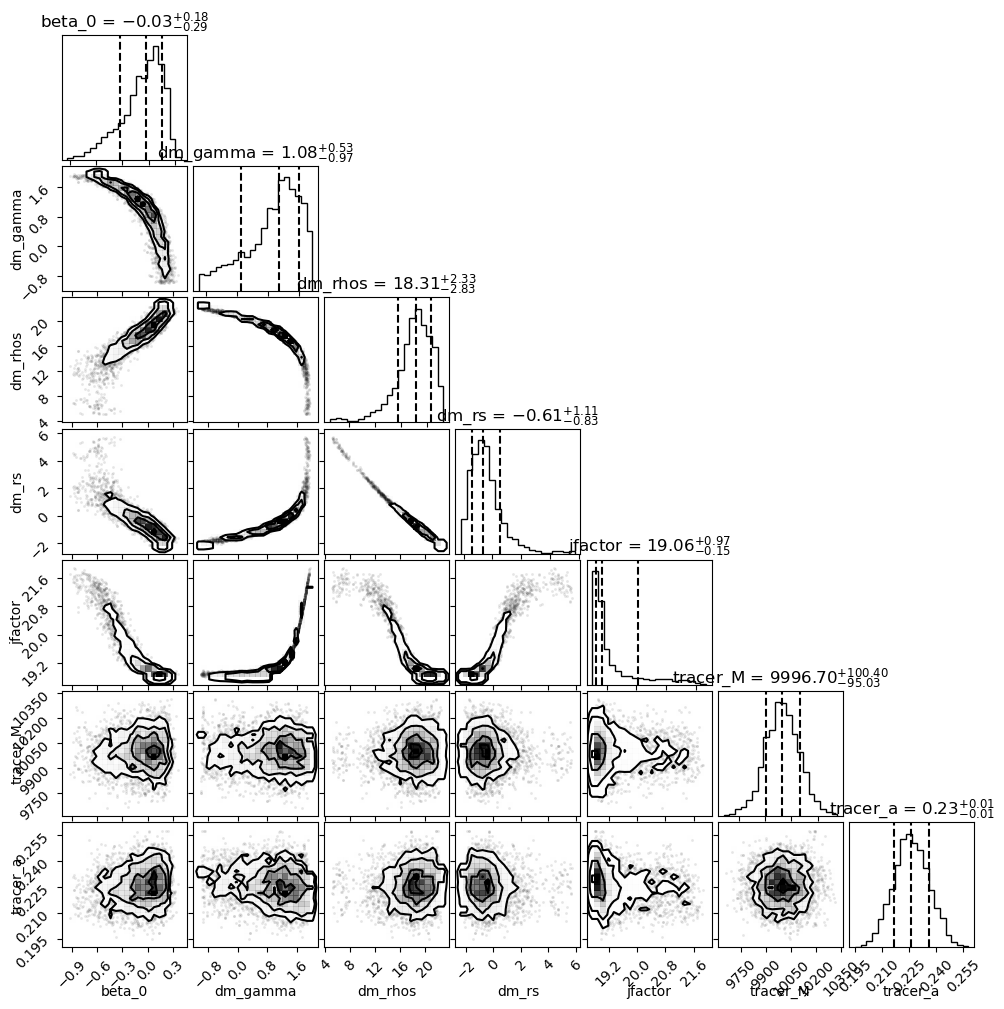

In [51]:
import corner
fig, ax = plt.subplots(nrows=7,ncols=7,figsize=(10,10))
corner.corner(inf_data,fig=fig,quantiles=[0.16, 0.5, 0.84],show_titles=True);
ax = ax.flatten()
# ax[12].set(
#     yscale='log',
#     ylim = (jnp.exp(5),jnp.exp(30))c
# );
# ax[31].set(
#     # yscale='log',
#     # ylim = (jnp.exp(5),jnp.exp(30))
#     xlim = (0,5)
# );